## Question 1

In [177]:
import numpy as np
from random import uniform


def generateData():
    nSamples = 400
    inp = np.zeros((400, 2))
    out = np.zeros(400)
    
    for i in range(nSamples):
        x1 = uniform(-4, 4)
        x2 = uniform(-4, 4)
        eps = np.random.normal(0, 0.01)
        
        inp[i, 0], inp[i, 1] = x1, x2
        out[i] = 2*x1 + 3*x2 + eps
        
    return inp, out


def getError(w1, w2, inp, out):
    err = 0.0
    
    for i in range(out.shape[0]):
        err += (w1*inp[i, 0] + w2*inp[i, 1] - out[i])**2
        
    return err/out.shape[0]

In [178]:
inp, out = generateData()

err = getError(2, 3, inp, out)
print("Optimum value at w1 = 2 and w2 = 3 is {}".format(err))

Optimum value at w1 = 2 and w2 = 3 is 9.229228725427763e-05


w1 = 1.9819819819819813 and w2 = 2.982982982982982, gives minimum = 0.0034456140126742883


<IPython.core.display.Javascript object>


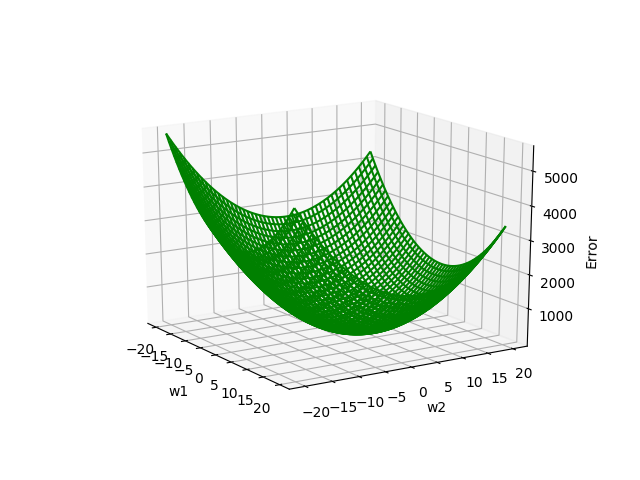

In [179]:
# Q.2

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plotError():
    w1s = w2s = np.linspace(-20, 20, 1000)
    W1S, W2S = np.meshgrid(w1s, w2s)
    ERR = getError(W1S, W2S, inp, out)
    
    print("w1 = {} and w2 = {}, gives minimum = {}".format(w1s[549], w1s[574], np.min(ERR)))
#     print(np.unravel_index(ERR.argmin(), ERR.shape))
#     print(getError(w1s[549], w1s[574], inp, out))
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(W1S, W2S, ERR, color='green')
#     ax.plot_surface(W1S, W2S, ERR, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('Error')
    plt.show()


plotError()

In [180]:
# Q.3

def getOptLr():
    sum1, sum2 = 0.0, 0.0

    for i in range(inp.shape[0]):
        sum1 += inp[i, 0]**2
        sum2 += inp[i, 1]**2

    nOpt1, nOpt2 = out.shape[0]/(2*sum1), out.shape[0]/(2*sum2)
    
    return nOpt1, nOpt2


nOpt1, nOpt2 = getOptLr()
print("Optimum learning rate for w1 = {} and w2 = {}".format(nOpt1, nOpt2))

Optimum learning rate for w1 = 0.09075397934436673 and w2 = 0.08933208775761611


In [181]:
# Q.4

def getGrad(w1, w2):
    grad = {'w1': 0.0,  'w2': 0.0}
    
    sum1, sum2 = 0.0, 0.0
    for i in range(inp.shape[0]):
        sum1 += (w1*inp[i, 0] + w2*inp[i, 1] - out[i]) * inp[i, 0]
        sum2 += (w1*inp[i, 0] + w2*inp[i, 1] - out[i]) * inp[i, 1]
    
    grad['w1'] = 2*sum1/out.shape[0]
    grad['w2'] = 2*sum2/out.shape[0]
    
    return grad


def optimize(nOpt):
    nIter = 0
    w1, w2 = -10.0, 20.0
    thresErr = 0.001
    err = getError(w1, w2, inp, out)
    errors = []
    weights = []

    while(err > thresErr):
        err = getError(w1, w2, inp, out)
        print("Iter = {}. Error = {:.4f} at w1 = {:.4f} and w2 = {:.4f}".format(nIter, err, w1, w2))
        errors.append(err)
        weights.append((w1, w2))
        
        grad = getGrad(w1, w2)
        w1 = w1 - nOpt*grad['w1']
        w2 = w2 - nOpt*grad['w2']

        nIter += 1
        
    return errors, weights

        
nOpt = np.min((nOpt1, nOpt2))
errors1, weights1 = optimize((0.9/2)*nOpt)
print("--"*30)
errors2, weights2 = optimize((1.5/2)*nOpt)
print("--"*30)
errors3, weights3 = optimize(nOpt)
print("--"*30)
errors4, weights4 = optimize(1.5*nOpt)

Iter = 0. Error = 2422.0194 at w1 = -10.0000 and w2 = 20.0000
Iter = 1. Error = 733.4008 at w1 = -4.6475 and w2 = 12.3237
Iter = 2. Error = 222.0974 at w1 = -1.6826 and w2 = 8.1135
Iter = 3. Error = 67.2644 at w1 = -0.0403 and w2 = 5.8043
Iter = 4. Error = 20.3736 at w1 = 0.8696 and w2 = 4.5378
Iter = 5. Error = 6.1716 at w1 = 1.3736 and w2 = 3.8433
Iter = 6. Error = 1.8697 at w1 = 1.6529 and w2 = 3.4624
Iter = 7. Error = 0.5665 at w1 = 1.8076 and w2 = 3.2535
Iter = 8. Error = 0.1717 at w1 = 1.8934 and w2 = 3.1389
Iter = 9. Error = 0.0521 at w1 = 1.9409 and w2 = 3.0761
Iter = 10. Error = 0.0159 at w1 = 1.9672 and w2 = 3.0417
Iter = 11. Error = 0.0049 at w1 = 1.9818 and w2 = 3.0228
Iter = 12. Error = 0.0015 at w1 = 1.9899 and w2 = 3.0124
Iter = 13. Error = 0.0005 at w1 = 1.9944 and w2 = 3.0067
------------------------------------------------------------
Iter = 0. Error = 2422.0194 at w1 = -10.0000 and w2 = 20.0000
Iter = 1. Error = 151.9695 at w1 = -1.0792 and w2 = 7.2062
Iter = 2. Erro

<IPython.core.display.Javascript object>


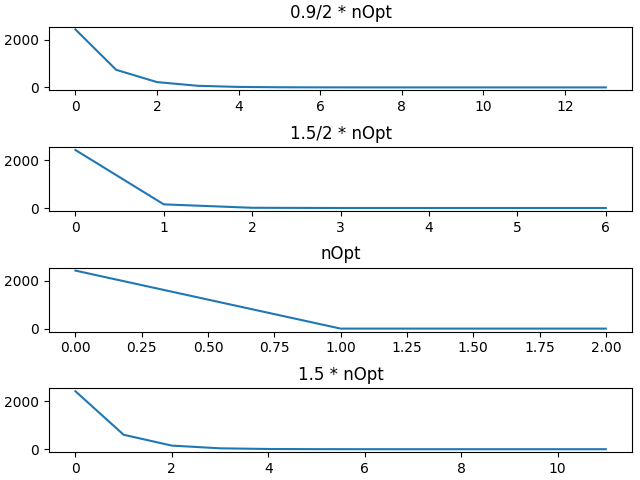

In [182]:
# Q.4.a

%matplotlib notebook


def plotErrors():
    fig, axs = plt.subplots(4, 1, constrained_layout=True)

    axs[0].plot(list(range(len(errors1))), errors1)
    axs[0].set_title('0.9/2 * nOpt')

    axs[1].plot(list(range(len(errors2))), errors2)
    axs[1].set_title('1.5/2 * nOpt')

    axs[2].plot(list(range(len(errors3))), errors3)
    axs[2].set_title('nOpt')

    axs[3].plot(list(range(len(errors4))), errors4)
    axs[3].set_title('1.5 * nOpt')

    plt.show()
    
    
plotErrors()

<IPython.core.display.Javascript object>


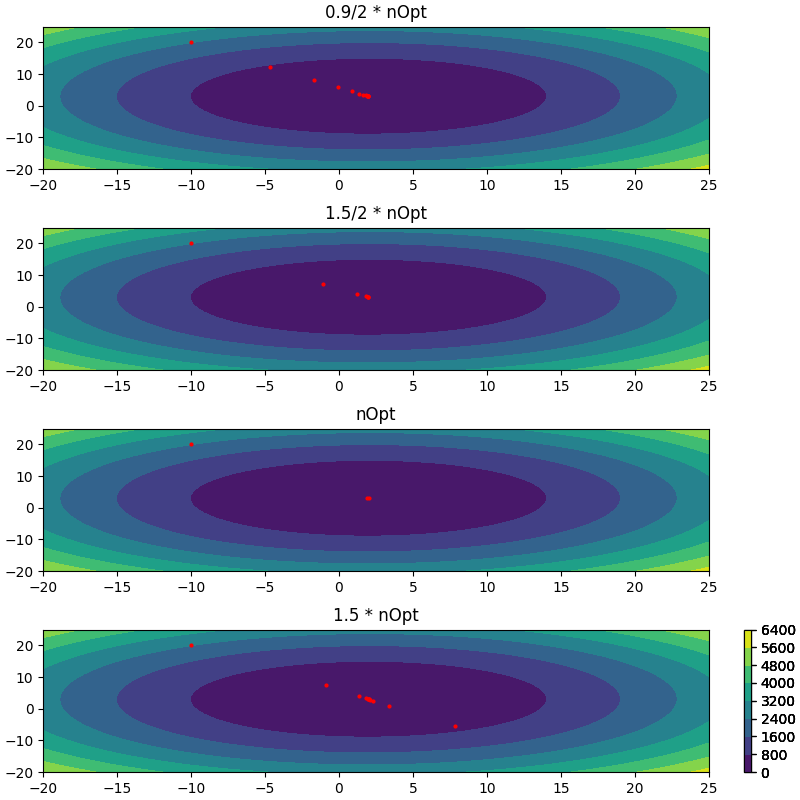

In [183]:
# Q.4.b

%matplotlib notebook


def plotContours():
    w1s = w2s = np.linspace(-20, 25, 1000)
    W1S, W2S = np.meshgrid(w1s, w2s)
    ERR = getError(W1S, W2S, inp, out)

    fig,ax = plt.subplots(4, 1, constrained_layout=True, figsize=(8, 8))

    cp = ax[0].contourf(W1S, W2S, ERR)
    ax[0].set_title('0.9/2 * nOpt')
    fig.colorbar(cp)

    cp = ax[1].contourf(W1S, W2S, ERR)
    ax[1].set_title('1.5/2 * nOpt')
    fig.colorbar(cp)

    cp = ax[2].contourf(W1S, W2S, ERR)
    ax[2].set_title('nOpt')
    fig.colorbar(cp)

    cp = ax[3].contourf(W1S, W2S, ERR)
    ax[3].set_title('1.5 * nOpt')
    fig.colorbar(cp)

    for w1, w2 in weights1:
        ax[0].plot(w1, w2, 'ro', markersize=2)

    for w1, w2 in weights2:
        ax[1].plot(w1, w2, 'ro', markersize=2)

    for w1, w2 in weights3:
        ax[2].plot(w1, w2, 'ro', markersize=2)

    for w1, w2 in weights4:
        ax[3].plot(w1, w2, 'ro', markersize=2)

    plt.show()
    
    
plotContours()

### Question 2


<IPython.core.display.Javascript object>


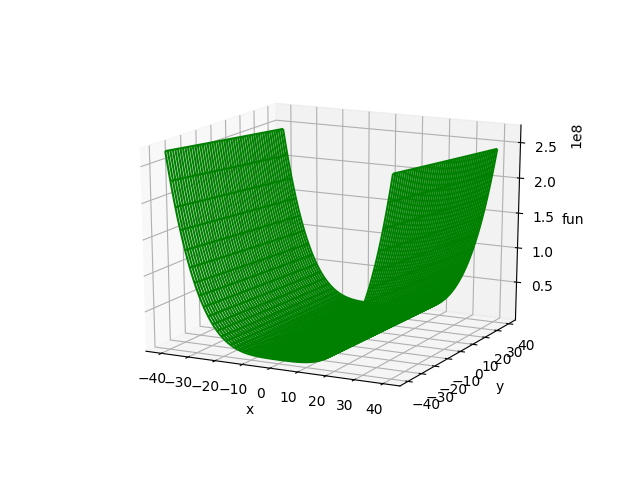

In [184]:
# Q.2.a

%matplotlib notebook

def f(x, y):
    return x**2 + 100*(y-x**2)**2


def plotCurve():
    x = y = np.linspace(-40, 40, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X, Y, fun, color='green')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('fun')
    plt.show()
    

plotCurve()

In [185]:
def getGrad(x, y):
    grad = {'x': 0.0, 'y': 0.0}
    
    grad['x'] = 2*x - 400*x*(y-x**2)
    grad['y'] = 200*(y-x**2)
    
    return grad
    
def gradDescent():
    x, y = -20.0, 10.0
    nIter = 0
    thresErr = 0.001
    nOpt = 0.000001
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x, y)
        x = x - nOpt*grad['x']
        y = y - nOpt*grad['y']
        
        nIter += 1
        
    return errors, weights


errors, weights = gradDescent()

Iter = 0. Error = 15210400.0000 at x = -20.0000 and y = 10.0000
Iter = 2000. Error = 10.8769 at x = -3.2977 and y = 10.8794
Iter = 4000. Error = 10.8750 at x = -3.2974 and y = 10.8775
Iter = 6000. Error = 10.8730 at x = -3.2971 and y = 10.8755
Iter = 8000. Error = 10.8711 at x = -3.2968 and y = 10.8736
Iter = 10000. Error = 10.8691 at x = -3.2965 and y = 10.8716
Iter = 12000. Error = 10.8672 at x = -3.2962 and y = 10.8697
Iter = 14000. Error = 10.8652 at x = -3.2959 and y = 10.8677
Iter = 16000. Error = 10.8633 at x = -3.2956 and y = 10.8658
Iter = 18000. Error = 10.8613 at x = -3.2953 and y = 10.8638
Iter = 20000. Error = 10.8593 at x = -3.2950 and y = 10.8618
Iter = 22000. Error = 10.8574 at x = -3.2947 and y = 10.8599
Iter = 24000. Error = 10.8554 at x = -3.2944 and y = 10.8579
Iter = 26000. Error = 10.8535 at x = -3.2941 and y = 10.8560
Iter = 28000. Error = 10.8515 at x = -3.2938 and y = 10.8540
Iter = 30000. Error = 10.8496 at x = -3.2935 and y = 10.8521
Iter = 32000. Error = 10.

Iter = 316000. Error = 10.5701 at x = -3.2508 and y = 10.5726
Iter = 318000. Error = 10.5681 at x = -3.2505 and y = 10.5706
Iter = 320000. Error = 10.5662 at x = -3.2502 and y = 10.5687
Iter = 322000. Error = 10.5642 at x = -3.2499 and y = 10.5667
Iter = 324000. Error = 10.5623 at x = -3.2496 and y = 10.5648
Iter = 326000. Error = 10.5603 at x = -3.2493 and y = 10.5628
Iter = 328000. Error = 10.5584 at x = -3.2490 and y = 10.5609
Iter = 330000. Error = 10.5564 at x = -3.2487 and y = 10.5589
Iter = 332000. Error = 10.5545 at x = -3.2484 and y = 10.5570
Iter = 334000. Error = 10.5525 at x = -3.2481 and y = 10.5550
Iter = 336000. Error = 10.5506 at x = -3.2478 and y = 10.5531
Iter = 338000. Error = 10.5486 at x = -3.2475 and y = 10.5511
Iter = 340000. Error = 10.5466 at x = -3.2472 and y = 10.5491
Iter = 342000. Error = 10.5447 at x = -3.2469 and y = 10.5472
Iter = 344000. Error = 10.5427 at x = -3.2466 and y = 10.5452
Iter = 346000. Error = 10.5408 at x = -3.2463 and y = 10.5433
Iter = 3

Iter = 728000. Error = 10.1678 at x = -3.1883 and y = 10.1703
Iter = 730000. Error = 10.1658 at x = -3.1880 and y = 10.1683
Iter = 732000. Error = 10.1639 at x = -3.1877 and y = 10.1664
Iter = 734000. Error = 10.1619 at x = -3.1874 and y = 10.1644
Iter = 736000. Error = 10.1600 at x = -3.1871 and y = 10.1625
Iter = 738000. Error = 10.1580 at x = -3.1868 and y = 10.1605
Iter = 740000. Error = 10.1561 at x = -3.1865 and y = 10.1586
Iter = 742000. Error = 10.1541 at x = -3.1862 and y = 10.1566
Iter = 744000. Error = 10.1522 at x = -3.1859 and y = 10.1547
Iter = 746000. Error = 10.1502 at x = -3.1856 and y = 10.1527
Iter = 748000. Error = 10.1483 at x = -3.1853 and y = 10.1508
Iter = 750000. Error = 10.1463 at x = -3.1850 and y = 10.1488
Iter = 752000. Error = 10.1444 at x = -3.1846 and y = 10.1469
Iter = 754000. Error = 10.1424 at x = -3.1843 and y = 10.1449
Iter = 756000. Error = 10.1405 at x = -3.1840 and y = 10.1430
Iter = 758000. Error = 10.1385 at x = -3.1837 and y = 10.1410
Iter = 7

Iter = 1490000. Error = 9.4248 at x = -3.0696 and y = 9.4273
Iter = 1492000. Error = 9.4228 at x = -3.0693 and y = 9.4253
Iter = 1494000. Error = 9.4209 at x = -3.0690 and y = 9.4234
Iter = 1496000. Error = 9.4189 at x = -3.0686 and y = 9.4214
Iter = 1498000. Error = 9.4170 at x = -3.0683 and y = 9.4195
Iter = 1500000. Error = 9.4150 at x = -3.0680 and y = 9.4175
Iter = 1502000. Error = 9.4131 at x = -3.0677 and y = 9.4156
Iter = 1504000. Error = 9.4111 at x = -3.0674 and y = 9.4136
Iter = 1506000. Error = 9.4092 at x = -3.0671 and y = 9.4117
Iter = 1508000. Error = 9.4072 at x = -3.0667 and y = 9.4097
Iter = 1510000. Error = 9.4053 at x = -3.0664 and y = 9.4078
Iter = 1512000. Error = 9.4033 at x = -3.0661 and y = 9.4058
Iter = 1514000. Error = 9.4014 at x = -3.0658 and y = 9.4039
Iter = 1516000. Error = 9.3994 at x = -3.0655 and y = 9.4019
Iter = 1518000. Error = 9.3975 at x = -3.0651 and y = 9.4000
Iter = 1520000. Error = 9.3955 at x = -3.0648 and y = 9.3980
Iter = 1522000. Error = 

Iter = 2128000. Error = 8.8038 at x = -2.9667 and y = 8.8063
Iter = 2130000. Error = 8.8019 at x = -2.9664 and y = 8.8044
Iter = 2132000. Error = 8.7999 at x = -2.9661 and y = 8.8024
Iter = 2134000. Error = 8.7980 at x = -2.9657 and y = 8.8005
Iter = 2136000. Error = 8.7960 at x = -2.9654 and y = 8.7985
Iter = 2138000. Error = 8.7941 at x = -2.9651 and y = 8.7966
Iter = 2140000. Error = 8.7921 at x = -2.9648 and y = 8.7946
Iter = 2142000. Error = 8.7902 at x = -2.9644 and y = 8.7927
Iter = 2144000. Error = 8.7883 at x = -2.9641 and y = 8.7908
Iter = 2146000. Error = 8.7863 at x = -2.9638 and y = 8.7888
Iter = 2148000. Error = 8.7844 at x = -2.9634 and y = 8.7869
Iter = 2150000. Error = 8.7824 at x = -2.9631 and y = 8.7849
Iter = 2152000. Error = 8.7805 at x = -2.9628 and y = 8.7830
Iter = 2154000. Error = 8.7785 at x = -2.9625 and y = 8.7810
Iter = 2156000. Error = 8.7766 at x = -2.9621 and y = 8.7791
Iter = 2158000. Error = 8.7746 at x = -2.9618 and y = 8.7771
Iter = 2160000. Error = 

Iter = 2876000. Error = 8.0774 at x = -2.8417 and y = 8.0798
Iter = 2878000. Error = 8.0754 at x = -2.8413 and y = 8.0779
Iter = 2880000. Error = 8.0735 at x = -2.8410 and y = 8.0760
Iter = 2882000. Error = 8.0715 at x = -2.8406 and y = 8.0740
Iter = 2884000. Error = 8.0696 at x = -2.8403 and y = 8.0721
Iter = 2886000. Error = 8.0677 at x = -2.8399 and y = 8.0701
Iter = 2888000. Error = 8.0657 at x = -2.8396 and y = 8.0682
Iter = 2890000. Error = 8.0638 at x = -2.8393 and y = 8.0663
Iter = 2892000. Error = 8.0618 at x = -2.8389 and y = 8.0643
Iter = 2894000. Error = 8.0599 at x = -2.8386 and y = 8.0624
Iter = 2896000. Error = 8.0580 at x = -2.8382 and y = 8.0605
Iter = 2898000. Error = 8.0560 at x = -2.8379 and y = 8.0585
Iter = 2900000. Error = 8.0541 at x = -2.8376 and y = 8.0566
Iter = 2902000. Error = 8.0521 at x = -2.8372 and y = 8.0546
Iter = 2904000. Error = 8.0502 at x = -2.8369 and y = 8.0527
Iter = 2906000. Error = 8.0483 at x = -2.8365 and y = 8.0508
Iter = 2908000. Error = 

Iter = 3544000. Error = 7.4302 at x = -2.7254 and y = 7.4327
Iter = 3546000. Error = 7.4283 at x = -2.7251 and y = 7.4308
Iter = 3548000. Error = 7.4264 at x = -2.7247 and y = 7.4289
Iter = 3550000. Error = 7.4244 at x = -2.7244 and y = 7.4269
Iter = 3552000. Error = 7.4225 at x = -2.7240 and y = 7.4250
Iter = 3554000. Error = 7.4206 at x = -2.7236 and y = 7.4231
Iter = 3556000. Error = 7.4186 at x = -2.7233 and y = 7.4211
Iter = 3558000. Error = 7.4167 at x = -2.7229 and y = 7.4192
Iter = 3560000. Error = 7.4148 at x = -2.7226 and y = 7.4173
Iter = 3562000. Error = 7.4128 at x = -2.7222 and y = 7.4153
Iter = 3564000. Error = 7.4109 at x = -2.7219 and y = 7.4134
Iter = 3566000. Error = 7.4090 at x = -2.7215 and y = 7.4114
Iter = 3568000. Error = 7.4070 at x = -2.7212 and y = 7.4095
Iter = 3570000. Error = 7.4051 at x = -2.7208 and y = 7.4076
Iter = 3572000. Error = 7.4031 at x = -2.7204 and y = 7.4056
Iter = 3574000. Error = 7.4012 at x = -2.7201 and y = 7.4037
Iter = 3576000. Error = 

Iter = 4124000. Error = 6.8698 at x = -2.6206 and y = 6.8723
Iter = 4126000. Error = 6.8679 at x = -2.6202 and y = 6.8704
Iter = 4128000. Error = 6.8660 at x = -2.6199 and y = 6.8685
Iter = 4130000. Error = 6.8641 at x = -2.6195 and y = 6.8666
Iter = 4132000. Error = 6.8621 at x = -2.6191 and y = 6.8646
Iter = 4134000. Error = 6.8602 at x = -2.6188 and y = 6.8627
Iter = 4136000. Error = 6.8583 at x = -2.6184 and y = 6.8608
Iter = 4138000. Error = 6.8563 at x = -2.6180 and y = 6.8588
Iter = 4140000. Error = 6.8544 at x = -2.6176 and y = 6.8569
Iter = 4142000. Error = 6.8525 at x = -2.6173 and y = 6.8550
Iter = 4144000. Error = 6.8505 at x = -2.6169 and y = 6.8530
Iter = 4146000. Error = 6.8486 at x = -2.6165 and y = 6.8511
Iter = 4148000. Error = 6.8467 at x = -2.6162 and y = 6.8492
Iter = 4150000. Error = 6.8448 at x = -2.6158 and y = 6.8473
Iter = 4152000. Error = 6.8428 at x = -2.6154 and y = 6.8453
Iter = 4154000. Error = 6.8409 at x = -2.6151 and y = 6.8434
Iter = 4156000. Error = 

Iter = 5122000. Error = 5.9095 at x = -2.4305 and y = 5.9120
Iter = 5124000. Error = 5.9076 at x = -2.4301 and y = 5.9101
Iter = 5126000. Error = 5.9057 at x = -2.4297 and y = 5.9082
Iter = 5128000. Error = 5.9037 at x = -2.4293 and y = 5.9062
Iter = 5130000. Error = 5.9018 at x = -2.4289 and y = 5.9043
Iter = 5132000. Error = 5.8999 at x = -2.4285 and y = 5.9024
Iter = 5134000. Error = 5.8980 at x = -2.4281 and y = 5.9005
Iter = 5136000. Error = 5.8961 at x = -2.4277 and y = 5.8986
Iter = 5138000. Error = 5.8942 at x = -2.4273 and y = 5.8967
Iter = 5140000. Error = 5.8922 at x = -2.4269 and y = 5.8947
Iter = 5142000. Error = 5.8903 at x = -2.4265 and y = 5.8928
Iter = 5144000. Error = 5.8884 at x = -2.4261 and y = 5.8909
Iter = 5146000. Error = 5.8865 at x = -2.4257 and y = 5.8890
Iter = 5148000. Error = 5.8846 at x = -2.4253 and y = 5.8871
Iter = 5150000. Error = 5.8826 at x = -2.4249 and y = 5.8851
Iter = 5152000. Error = 5.8807 at x = -2.4245 and y = 5.8832
Iter = 5154000. Error = 

Iter = 6122000. Error = 4.9536 at x = -2.2252 and y = 4.9561
Iter = 6124000. Error = 4.9517 at x = -2.2247 and y = 4.9542
Iter = 6126000. Error = 4.9498 at x = -2.2243 and y = 4.9523
Iter = 6128000. Error = 4.9479 at x = -2.2239 and y = 4.9504
Iter = 6130000. Error = 4.9460 at x = -2.2235 and y = 4.9485
Iter = 6132000. Error = 4.9441 at x = -2.2230 and y = 4.9466
Iter = 6134000. Error = 4.9422 at x = -2.2226 and y = 4.9447
Iter = 6136000. Error = 4.9403 at x = -2.2222 and y = 4.9428
Iter = 6138000. Error = 4.9384 at x = -2.2217 and y = 4.9409
Iter = 6140000. Error = 4.9365 at x = -2.2213 and y = 4.9390
Iter = 6142000. Error = 4.9346 at x = -2.2209 and y = 4.9371
Iter = 6144000. Error = 4.9327 at x = -2.2205 and y = 4.9352
Iter = 6146000. Error = 4.9308 at x = -2.2200 and y = 4.9333
Iter = 6148000. Error = 4.9289 at x = -2.2196 and y = 4.9314
Iter = 6150000. Error = 4.9270 at x = -2.2192 and y = 4.9295
Iter = 6152000. Error = 4.9251 at x = -2.2187 and y = 4.9276
Iter = 6154000. Error = 

Iter = 7104000. Error = 4.0236 at x = -2.0053 and y = 4.0261
Iter = 7106000. Error = 4.0218 at x = -2.0049 and y = 4.0243
Iter = 7108000. Error = 4.0199 at x = -2.0044 and y = 4.0224
Iter = 7110000. Error = 4.0180 at x = -2.0039 and y = 4.0205
Iter = 7112000. Error = 4.0161 at x = -2.0035 and y = 4.0186
Iter = 7114000. Error = 4.0142 at x = -2.0030 and y = 4.0167
Iter = 7116000. Error = 4.0123 at x = -2.0025 and y = 4.0148
Iter = 7118000. Error = 4.0105 at x = -2.0021 and y = 4.0130
Iter = 7120000. Error = 4.0086 at x = -2.0016 and y = 4.0111
Iter = 7122000. Error = 4.0067 at x = -2.0011 and y = 4.0092
Iter = 7124000. Error = 4.0048 at x = -2.0007 and y = 4.0073
Iter = 7126000. Error = 4.0029 at x = -2.0002 and y = 4.0054
Iter = 7128000. Error = 4.0011 at x = -1.9997 and y = 4.0035
Iter = 7130000. Error = 3.9992 at x = -1.9992 and y = 4.0017
Iter = 7132000. Error = 3.9973 at x = -1.9988 and y = 3.9998
Iter = 7134000. Error = 3.9954 at x = -1.9983 and y = 3.9979
Iter = 7136000. Error = 

Iter = 8120000. Error = 3.0749 at x = -1.7529 and y = 3.0774
Iter = 8122000. Error = 3.0731 at x = -1.7524 and y = 3.0755
Iter = 8124000. Error = 3.0712 at x = -1.7519 and y = 3.0737
Iter = 8126000. Error = 3.0694 at x = -1.7513 and y = 3.0718
Iter = 8128000. Error = 3.0675 at x = -1.7508 and y = 3.0700
Iter = 8130000. Error = 3.0657 at x = -1.7503 and y = 3.0682
Iter = 8132000. Error = 3.0638 at x = -1.7498 and y = 3.0663
Iter = 8134000. Error = 3.0620 at x = -1.7492 and y = 3.0645
Iter = 8136000. Error = 3.0601 at x = -1.7487 and y = 3.0626
Iter = 8138000. Error = 3.0583 at x = -1.7482 and y = 3.0608
Iter = 8140000. Error = 3.0564 at x = -1.7477 and y = 3.0589
Iter = 8142000. Error = 3.0546 at x = -1.7471 and y = 3.0571
Iter = 8144000. Error = 3.0527 at x = -1.7466 and y = 3.0552
Iter = 8146000. Error = 3.0509 at x = -1.7461 and y = 3.0534
Iter = 8148000. Error = 3.0490 at x = -1.7455 and y = 3.0515
Iter = 8150000. Error = 3.0472 at x = -1.7450 and y = 3.0497
Iter = 8152000. Error = 

Iter = 10118000. Error = 1.2936 at x = -1.1366 and y = 1.2960
Iter = 10120000. Error = 1.2919 at x = -1.1359 and y = 1.2944
Iter = 10122000. Error = 1.2902 at x = -1.1351 and y = 1.2927
Iter = 10124000. Error = 1.2886 at x = -1.1344 and y = 1.2910
Iter = 10126000. Error = 1.2869 at x = -1.1336 and y = 1.2893
Iter = 10128000. Error = 1.2852 at x = -1.1329 and y = 1.2877
Iter = 10130000. Error = 1.2835 at x = -1.1322 and y = 1.2860
Iter = 10132000. Error = 1.2819 at x = -1.1314 and y = 1.2843
Iter = 10134000. Error = 1.2802 at x = -1.1307 and y = 1.2826
Iter = 10136000. Error = 1.2785 at x = -1.1299 and y = 1.2810
Iter = 10138000. Error = 1.2769 at x = -1.1292 and y = 1.2793
Iter = 10140000. Error = 1.2752 at x = -1.1285 and y = 1.2776
Iter = 10142000. Error = 1.2735 at x = -1.1277 and y = 1.2759
Iter = 10144000. Error = 1.2718 at x = -1.1270 and y = 1.2743
Iter = 10146000. Error = 1.2702 at x = -1.1262 and y = 1.2726
Iter = 10148000. Error = 1.2685 at x = -1.1255 and y = 1.2709
Iter = 1

Iter = 11118000. Error = 0.5212 at x = -0.7212 and y = 0.5235
Iter = 11120000. Error = 0.5199 at x = -0.7202 and y = 0.5221
Iter = 11122000. Error = 0.5185 at x = -0.7193 and y = 0.5208
Iter = 11124000. Error = 0.5172 at x = -0.7184 and y = 0.5194
Iter = 11126000. Error = 0.5158 at x = -0.7174 and y = 0.5181
Iter = 11128000. Error = 0.5145 at x = -0.7165 and y = 0.5167
Iter = 11130000. Error = 0.5132 at x = -0.7156 and y = 0.5154
Iter = 11132000. Error = 0.5118 at x = -0.7146 and y = 0.5140
Iter = 11134000. Error = 0.5105 at x = -0.7137 and y = 0.5127
Iter = 11136000. Error = 0.5091 at x = -0.7127 and y = 0.5114
Iter = 11138000. Error = 0.5078 at x = -0.7118 and y = 0.5100
Iter = 11140000. Error = 0.5065 at x = -0.7109 and y = 0.5087
Iter = 11142000. Error = 0.5051 at x = -0.7099 and y = 0.5073
Iter = 11144000. Error = 0.5038 at x = -0.7090 and y = 0.5060
Iter = 11146000. Error = 0.5024 at x = -0.7080 and y = 0.5047
Iter = 11148000. Error = 0.5011 at x = -0.7071 and y = 0.5033
Iter = 1

Iter = 11690000. Error = 0.1953 at x = -0.4414 and y = 0.1970
Iter = 11692000. Error = 0.1944 at x = -0.4404 and y = 0.1961
Iter = 11694000. Error = 0.1935 at x = -0.4394 and y = 0.1952
Iter = 11696000. Error = 0.1927 at x = -0.4384 and y = 0.1944
Iter = 11698000. Error = 0.1918 at x = -0.4374 and y = 0.1935
Iter = 11700000. Error = 0.1909 at x = -0.4364 and y = 0.1926
Iter = 11702000. Error = 0.1901 at x = -0.4354 and y = 0.1918
Iter = 11704000. Error = 0.1892 at x = -0.4344 and y = 0.1909
Iter = 11706000. Error = 0.1883 at x = -0.4334 and y = 0.1900
Iter = 11708000. Error = 0.1875 at x = -0.4325 and y = 0.1892
Iter = 11710000. Error = 0.1866 at x = -0.4315 and y = 0.1883
Iter = 11712000. Error = 0.1858 at x = -0.4305 and y = 0.1875
Iter = 11714000. Error = 0.1849 at x = -0.4295 and y = 0.1866
Iter = 11716000. Error = 0.1841 at x = -0.4285 and y = 0.1858
Iter = 11718000. Error = 0.1832 at x = -0.4275 and y = 0.1849
Iter = 11720000. Error = 0.1824 at x = -0.4265 and y = 0.1841
Iter = 1

Iter = 12116000. Error = 0.0610 at x = -0.2467 and y = 0.0618
Iter = 12118000. Error = 0.0606 at x = -0.2459 and y = 0.0615
Iter = 12120000. Error = 0.0602 at x = -0.2451 and y = 0.0611
Iter = 12122000. Error = 0.0598 at x = -0.2443 and y = 0.0607
Iter = 12124000. Error = 0.0594 at x = -0.2435 and y = 0.0603
Iter = 12126000. Error = 0.0590 at x = -0.2428 and y = 0.0599
Iter = 12128000. Error = 0.0586 at x = -0.2420 and y = 0.0595
Iter = 12130000. Error = 0.0583 at x = -0.2412 and y = 0.0591
Iter = 12132000. Error = 0.0579 at x = -0.2404 and y = 0.0587
Iter = 12134000. Error = 0.0575 at x = -0.2396 and y = 0.0584
Iter = 12136000. Error = 0.0571 at x = -0.2389 and y = 0.0580
Iter = 12138000. Error = 0.0568 at x = -0.2381 and y = 0.0576
Iter = 12140000. Error = 0.0564 at x = -0.2373 and y = 0.0572
Iter = 12142000. Error = 0.0560 at x = -0.2365 and y = 0.0569
Iter = 12144000. Error = 0.0557 at x = -0.2358 and y = 0.0565
Iter = 12146000. Error = 0.0553 at x = -0.2350 and y = 0.0561
Iter = 1

Iter = 13114000. Error = 0.0014 at x = -0.0378 and y = 0.0015
Iter = 13116000. Error = 0.0014 at x = -0.0377 and y = 0.0014
Iter = 13118000. Error = 0.0014 at x = -0.0375 and y = 0.0014
Iter = 13120000. Error = 0.0014 at x = -0.0374 and y = 0.0014
Iter = 13122000. Error = 0.0014 at x = -0.0372 and y = 0.0014
Iter = 13124000. Error = 0.0014 at x = -0.0371 and y = 0.0014
Iter = 13126000. Error = 0.0014 at x = -0.0369 and y = 0.0014
Iter = 13128000. Error = 0.0014 at x = -0.0368 and y = 0.0014
Iter = 13130000. Error = 0.0013 at x = -0.0366 and y = 0.0014
Iter = 13132000. Error = 0.0013 at x = -0.0365 and y = 0.0014
Iter = 13134000. Error = 0.0013 at x = -0.0363 and y = 0.0013
Iter = 13136000. Error = 0.0013 at x = -0.0362 and y = 0.0013
Iter = 13138000. Error = 0.0013 at x = -0.0361 and y = 0.0013
Iter = 13140000. Error = 0.0013 at x = -0.0359 and y = 0.0013
Iter = 13142000. Error = 0.0013 at x = -0.0358 and y = 0.0013
Iter = 13144000. Error = 0.0013 at x = -0.0356 and y = 0.0013
Iter = 1

Number of iterations for Gradient Descent = 13203972


<IPython.core.display.Javascript object>


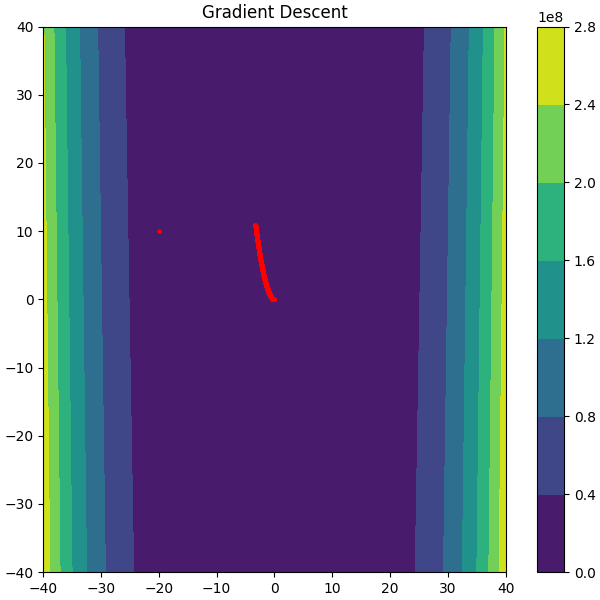

In [186]:
%matplotlib notebook


def plotError():
    plt.plot(list(range(len(errors))), errors, 'r-')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()
    
    
def plotContours():
    x = y = np.linspace(-40, 40, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Gradient Descent')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    

# plotError()
print("Number of iterations for Gradient Descent = {}".format(len(weights)))
plotContours()

In [187]:
# Q.2.b


def momentum():
    x, y = -20.0, 10.0
    nIter = 0
    thresErr = 0.001
    nOpt = 0.000001
    beta = 0.9
    delx = 0.0
    dely = 0.0
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x, y)
        delx = beta*delx - nOpt*grad['x']
        dely = beta*dely - nOpt*grad['y']
        x = x + delx
        y = y + dely
        
        nIter += 1
        
    return errors, weights


errors, weights = momentum()

Iter = 0. Error = 15210400.0000 at x = -20.0000 and y = 10.0000
Iter = 2000. Error = 13.9289 at x = -3.7318 and y = 13.9314
Iter = 4000. Error = 13.9092 at x = -3.7292 and y = 13.9117
Iter = 6000. Error = 13.8896 at x = -3.7266 and y = 13.8921
Iter = 8000. Error = 13.8700 at x = -3.7239 and y = 13.8725
Iter = 10000. Error = 13.8503 at x = -3.7213 and y = 13.8528
Iter = 12000. Error = 13.8307 at x = -3.7186 and y = 13.8332
Iter = 14000. Error = 13.8110 at x = -3.7160 and y = 13.8135
Iter = 16000. Error = 13.7914 at x = -3.7133 and y = 13.7939
Iter = 18000. Error = 13.7717 at x = -3.7107 and y = 13.7742
Iter = 20000. Error = 13.7521 at x = -3.7081 and y = 13.7546
Iter = 22000. Error = 13.7324 at x = -3.7054 and y = 13.7349
Iter = 24000. Error = 13.7128 at x = -3.7028 and y = 13.7153
Iter = 26000. Error = 13.6932 at x = -3.7001 and y = 13.6957
Iter = 28000. Error = 13.6735 at x = -3.6974 and y = 13.6760
Iter = 30000. Error = 13.6539 at x = -3.6948 and y = 13.6564
Iter = 32000. Error = 13.

Iter = 302000. Error = 10.9882 at x = -3.3145 and y = 10.9907
Iter = 304000. Error = 10.9686 at x = -3.3115 and y = 10.9711
Iter = 306000. Error = 10.9491 at x = -3.3086 and y = 10.9516
Iter = 308000. Error = 10.9295 at x = -3.3056 and y = 10.9320
Iter = 310000. Error = 10.9100 at x = -3.3027 and y = 10.9125
Iter = 312000. Error = 10.8904 at x = -3.2997 and y = 10.8929
Iter = 314000. Error = 10.8709 at x = -3.2967 and y = 10.8734
Iter = 316000. Error = 10.8513 at x = -3.2938 and y = 10.8538
Iter = 318000. Error = 10.8318 at x = -3.2908 and y = 10.8343
Iter = 320000. Error = 10.8122 at x = -3.2878 and y = 10.8147
Iter = 322000. Error = 10.7927 at x = -3.2849 and y = 10.7952
Iter = 324000. Error = 10.7731 at x = -3.2819 and y = 10.7756
Iter = 326000. Error = 10.7536 at x = -3.2789 and y = 10.7561
Iter = 328000. Error = 10.7340 at x = -3.2759 and y = 10.7365
Iter = 330000. Error = 10.7145 at x = -3.2729 and y = 10.7170
Iter = 332000. Error = 10.6950 at x = -3.2699 and y = 10.6975
Iter = 3

Iter = 638000. Error = 7.7166 at x = -2.7775 and y = 7.7191
Iter = 640000. Error = 7.6972 at x = -2.7740 and y = 7.6997
Iter = 642000. Error = 7.6778 at x = -2.7705 and y = 7.6803
Iter = 644000. Error = 7.6585 at x = -2.7670 and y = 7.6610
Iter = 646000. Error = 7.6391 at x = -2.7635 and y = 7.6416
Iter = 648000. Error = 7.6197 at x = -2.7600 and y = 7.6222
Iter = 650000. Error = 7.6004 at x = -2.7565 and y = 7.6029
Iter = 652000. Error = 7.5810 at x = -2.7529 and y = 7.5835
Iter = 654000. Error = 7.5616 at x = -2.7494 and y = 7.5641
Iter = 656000. Error = 7.5423 at x = -2.7459 and y = 7.5448
Iter = 658000. Error = 7.5229 at x = -2.7424 and y = 7.5254
Iter = 660000. Error = 7.5036 at x = -2.7388 and y = 7.5061
Iter = 662000. Error = 7.4842 at x = -2.7353 and y = 7.4867
Iter = 664000. Error = 7.4649 at x = -2.7318 and y = 7.4674
Iter = 666000. Error = 7.4455 at x = -2.7282 and y = 7.4480
Iter = 668000. Error = 7.4262 at x = -2.7247 and y = 7.4287
Iter = 670000. Error = 7.4068 at x = -2.

Iter = 920000. Error = 5.0049 at x = -2.2366 and y = 5.0074
Iter = 922000. Error = 4.9858 at x = -2.2324 and y = 4.9883
Iter = 924000. Error = 4.9668 at x = -2.2281 and y = 4.9693
Iter = 926000. Error = 4.9477 at x = -2.2238 and y = 4.9502
Iter = 928000. Error = 4.9287 at x = -2.2196 and y = 4.9312
Iter = 930000. Error = 4.9097 at x = -2.2153 and y = 4.9122
Iter = 932000. Error = 4.8906 at x = -2.2110 and y = 4.8931
Iter = 934000. Error = 4.8716 at x = -2.2067 and y = 4.8741
Iter = 936000. Error = 4.8526 at x = -2.2023 and y = 4.8551
Iter = 938000. Error = 4.8336 at x = -2.1980 and y = 4.8361
Iter = 940000. Error = 4.8146 at x = -2.1937 and y = 4.8170
Iter = 942000. Error = 4.7955 at x = -2.1894 and y = 4.7980
Iter = 944000. Error = 4.7765 at x = -2.1850 and y = 4.7790
Iter = 946000. Error = 4.7575 at x = -2.1807 and y = 4.7600
Iter = 948000. Error = 4.7385 at x = -2.1763 and y = 4.7410
Iter = 950000. Error = 4.7195 at x = -2.1719 and y = 4.7220
Iter = 952000. Error = 4.7005 at x = -2.

Iter = 1462000. Error = 0.2943 at x = -0.5418 and y = 0.2962
Iter = 1464000. Error = 0.2836 at x = -0.5318 and y = 0.2855
Iter = 1466000. Error = 0.2730 at x = -0.5219 and y = 0.2750
Iter = 1468000. Error = 0.2627 at x = -0.5119 and y = 0.2646
Iter = 1470000. Error = 0.2526 at x = -0.5019 and y = 0.2545
Iter = 1472000. Error = 0.2426 at x = -0.4920 and y = 0.2445
Iter = 1474000. Error = 0.2329 at x = -0.4820 and y = 0.2347
Iter = 1476000. Error = 0.2234 at x = -0.4720 and y = 0.2252
Iter = 1478000. Error = 0.2140 at x = -0.4621 and y = 0.2158
Iter = 1480000. Error = 0.2049 at x = -0.4521 and y = 0.2067
Iter = 1482000. Error = 0.1961 at x = -0.4422 and y = 0.1978
Iter = 1484000. Error = 0.1874 at x = -0.4323 and y = 0.1891
Iter = 1486000. Error = 0.1789 at x = -0.4225 and y = 0.1806
Iter = 1488000. Error = 0.1707 at x = -0.4127 and y = 0.1723
Iter = 1490000. Error = 0.1627 at x = -0.4029 and y = 0.1643
Iter = 1492000. Error = 0.1550 at x = -0.3932 and y = 0.1565
Iter = 1494000. Error = 

Number of iterations for momentum = 1633552


<IPython.core.display.Javascript object>


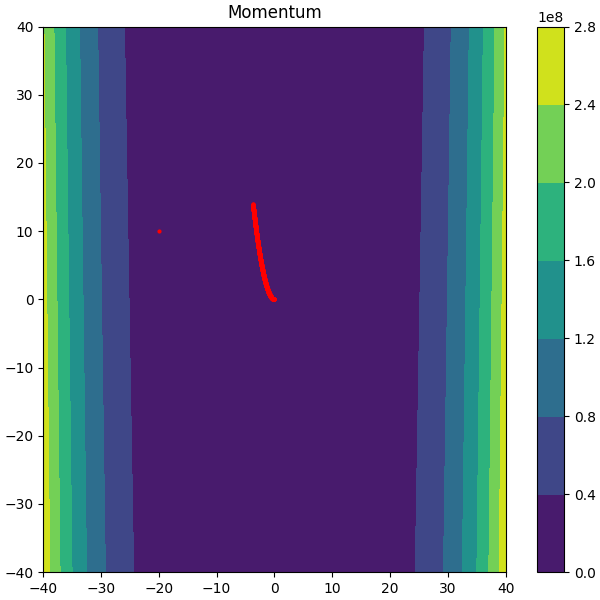

In [188]:
def plotContours():
    x = y = np.linspace(-40, 40, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Momentum')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    

print("Number of iterations for momentum = {}".format(len(weights)))
plotContours()

In [189]:
# Q.2.c


def nestMomentum():
    x, y = -20.0, 10.0
    nIter = 0
    thresErr = 0.001
    nOpt = 0.000001
    beta = 0.9
    delx = 0.0
    dely = 0.0
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x + beta*delx, y)
        delx = beta*delx - nOpt*grad['x']
        
        grad = getGrad(x, y + beta*dely)
        dely = beta*dely - nOpt*grad['y']
        
        x = x + delx
        y = y + dely
        
        nIter += 1
        
    return errors, weights


errors, weights = nestMomentum()

Iter = 0. Error = 15210400.0000 at x = -20.0000 and y = 10.0000
Iter = 2000. Error = 12.1366 at x = -3.4834 and y = 12.1391
Iter = 4000. Error = 12.1171 at x = -3.4806 and y = 12.1196
Iter = 6000. Error = 12.0976 at x = -3.4778 and y = 12.1001
Iter = 8000. Error = 12.0780 at x = -3.4750 and y = 12.0805
Iter = 10000. Error = 12.0585 at x = -3.4722 and y = 12.0610
Iter = 12000. Error = 12.0390 at x = -3.4694 and y = 12.0415
Iter = 14000. Error = 12.0195 at x = -3.4666 and y = 12.0220
Iter = 16000. Error = 11.9999 at x = -3.4637 and y = 12.0024
Iter = 18000. Error = 11.9804 at x = -3.4609 and y = 11.9829
Iter = 20000. Error = 11.9609 at x = -3.4581 and y = 11.9634
Iter = 22000. Error = 11.9414 at x = -3.4553 and y = 11.9439
Iter = 24000. Error = 11.9219 at x = -3.4525 and y = 11.9244
Iter = 26000. Error = 11.9023 at x = -3.4496 and y = 11.9048
Iter = 28000. Error = 11.8828 at x = -3.4468 and y = 11.8853
Iter = 30000. Error = 11.8633 at x = -3.4440 and y = 11.8658
Iter = 32000. Error = 11.

Iter = 286000. Error = 9.3712 at x = -3.0609 and y = 9.3737
Iter = 288000. Error = 9.3518 at x = -3.0577 and y = 9.3543
Iter = 290000. Error = 9.3324 at x = -3.0545 and y = 9.3349
Iter = 292000. Error = 9.3130 at x = -3.0513 and y = 9.3155
Iter = 294000. Error = 9.2936 at x = -3.0482 and y = 9.2961
Iter = 296000. Error = 9.2742 at x = -3.0450 and y = 9.2767
Iter = 298000. Error = 9.2548 at x = -3.0418 and y = 9.2573
Iter = 300000. Error = 9.2354 at x = -3.0386 and y = 9.2379
Iter = 302000. Error = 9.2160 at x = -3.0354 and y = 9.2185
Iter = 304000. Error = 9.1966 at x = -3.0322 and y = 9.1991
Iter = 306000. Error = 9.1772 at x = -3.0290 and y = 9.1797
Iter = 308000. Error = 9.1578 at x = -3.0258 and y = 9.1603
Iter = 310000. Error = 9.1384 at x = -3.0226 and y = 9.1409
Iter = 312000. Error = 9.1190 at x = -3.0194 and y = 9.1215
Iter = 314000. Error = 9.0996 at x = -3.0162 and y = 9.1021
Iter = 316000. Error = 9.0802 at x = -3.0129 and y = 9.0827
Iter = 318000. Error = 9.0608 at x = -3.

Iter = 960000. Error = 2.9440 at x = -1.7152 and y = 2.9465
Iter = 962000. Error = 2.9256 at x = -1.7098 and y = 2.9281
Iter = 964000. Error = 2.9072 at x = -1.7044 and y = 2.9097
Iter = 966000. Error = 2.8889 at x = -1.6991 and y = 2.8914
Iter = 968000. Error = 2.8705 at x = -1.6936 and y = 2.8730
Iter = 970000. Error = 2.8522 at x = -1.6882 and y = 2.8547
Iter = 972000. Error = 2.8339 at x = -1.6828 and y = 2.8364
Iter = 974000. Error = 2.8156 at x = -1.6773 and y = 2.8181
Iter = 976000. Error = 2.7973 at x = -1.6719 and y = 2.7998
Iter = 978000. Error = 2.7790 at x = -1.6664 and y = 2.7815
Iter = 980000. Error = 2.7607 at x = -1.6609 and y = 2.7632
Iter = 982000. Error = 2.7424 at x = -1.6554 and y = 2.7449
Iter = 984000. Error = 2.7242 at x = -1.6499 and y = 2.7267
Iter = 986000. Error = 2.7059 at x = -1.6443 and y = 2.7084
Iter = 988000. Error = 2.6877 at x = -1.6388 and y = 2.6902
Iter = 990000. Error = 2.6694 at x = -1.6332 and y = 2.6719
Iter = 992000. Error = 2.6512 at x = -1.

Number of iterations for Nestron momentum = 1455252


<IPython.core.display.Javascript object>


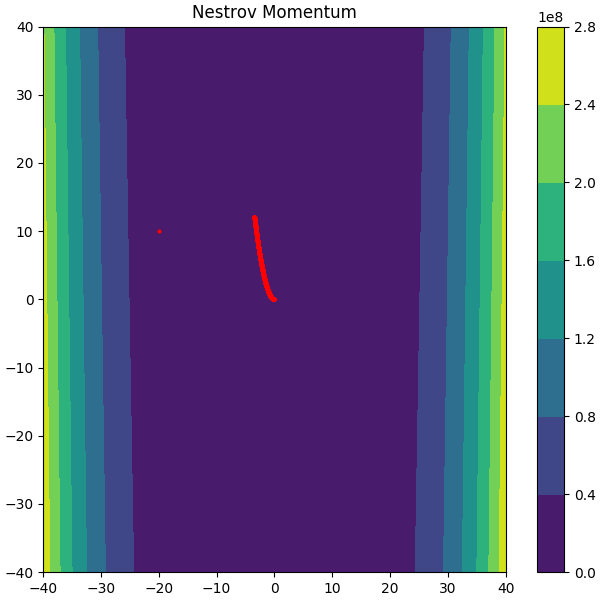

In [190]:
def plotContours():
    x = y = np.linspace(-40, 40, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Nestrov Momentum')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    
    
print("Number of iterations for Nestron momentum = {}".format(len(weights)))
plotContours()

In [191]:
# Q.2.d


def adam():
    x, y = -20.0, 10.0
    nIter = 0
    thresErr = 0.001
    nOpt = 0.001
    rho1, rho2 = 0.9, 0.999
    delta = 0.00000001
    s, r = 0.0, 0.0
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x, y)
        
        nIter += 1
        
        s = rho1*s + (1-rho1)*grad['x']
        r = rho2*r + (1-rho2)*(grad['x']**2)
        sCap = s/(1 - rho1**nIter)
        rCap = r/(1 - rho2**nIter)
        delx = -nOpt*sCap/(np.sqrt(rCap) + delta)
        x = x + delx

        s = rho1*s + (1-rho1)*grad['y']
        r = rho2*r + (1-rho2)*(grad['y']**2)
        sCap = s/(1 - rho1**nIter)
        rCap = r/(1 - rho2**nIter)
        dely = -nOpt*sCap/(np.sqrt(rCap) + delta)
        y = y + dely
        
    return errors, weights

errors, weights = adam()

Iter = 0. Error = 15210400.0000 at x = -20.0000 and y = 10.0000
Iter = 2000. Error = 11590363.6058 at x = -18.7503 and y = 11.1314
Iter = 4000. Error = 8337846.7084 at x = -17.3535 and y = 12.3962
Iter = 6000. Error = 5769803.7842 at x = -15.9337 and y = 13.6826
Iter = 8000. Error = 3832908.4830 at x = -14.5169 and y = 14.9670
Iter = 10000. Error = 2421088.4265 at x = -13.1087 and y = 16.2444
Iter = 12000. Error = 1432182.7167 at x = -11.7124 and y = 17.5120
Iter = 14000. Error = 774449.4619 at x = -10.3326 and y = 18.7658
Iter = 16000. Error = 367168.8752 at x = -8.9770 and y = 19.9992
Iter = 18000. Error = 140577.5348 at x = -7.6606 and y = 21.1989
Iter = 20000. Error = 35596.0904 at x = -6.4179 and y = 22.3336
Iter = 22000. Error = 2939.9883 at x = -5.3573 and y = 23.3046
Iter = 24000. Error = 24.1938 at x = -4.8791 and y = 23.7432
Iter = 26000. Error = 23.7463 at x = -4.8728 and y = 23.7488
Iter = 28000. Error = 23.7447 at x = -4.8726 and y = 23.7472
Iter = 30000. Error = 23.7333 a

Iter = 274000. Error = 1.7975 at x = -1.3402 and y = 1.7998
Iter = 276000. Error = 1.6456 at x = -1.2823 and y = 1.6479
Iter = 278000. Error = 1.4956 at x = -1.2224 and y = 1.4979
Iter = 280000. Error = 1.3479 at x = -1.1604 and y = 1.3502
Iter = 282000. Error = 1.2026 at x = -1.0961 and y = 1.2049
Iter = 284000. Error = 1.0601 at x = -1.0291 and y = 1.0624
Iter = 286000. Error = 0.9208 at x = -0.9590 and y = 0.9231
Iter = 288000. Error = 0.7852 at x = -0.8855 and y = 0.7874
Iter = 290000. Error = 0.6539 at x = -0.8080 and y = 0.6561
Iter = 292000. Error = 0.5277 at x = -0.7258 and y = 0.5298
Iter = 294000. Error = 0.4078 at x = -0.6380 and y = 0.4098
Iter = 296000. Error = 0.2957 at x = -0.5432 and y = 0.2977
Iter = 298000. Error = 0.1939 at x = -0.4398 and y = 0.1957
Iter = 300000. Error = 0.1062 at x = -0.3253 and y = 0.1078
Iter = 302000. Error = 0.0392 at x = -0.1975 and y = 0.0404
Iter = 304000. Error = 0.0039 at x = -0.0624 and y = 0.0044


Number of iterations for adam = 304545


<IPython.core.display.Javascript object>


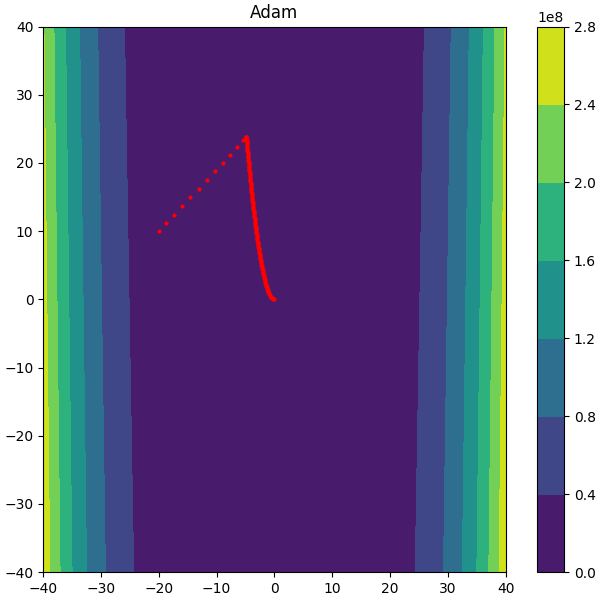

In [192]:
def plotContours():
    x = y = np.linspace(-40, 40, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Adam')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    

print("Number of iterations for adam = {}".format(len(weights)))
plotContours()

### Results for number of steps required to converge

1. Gradient Descent = 13203972
2. Momentum = 1633552
3. Nestrov momentum = 1455252
4. Adam = 304545

### Question 3

<IPython.core.display.Javascript object>


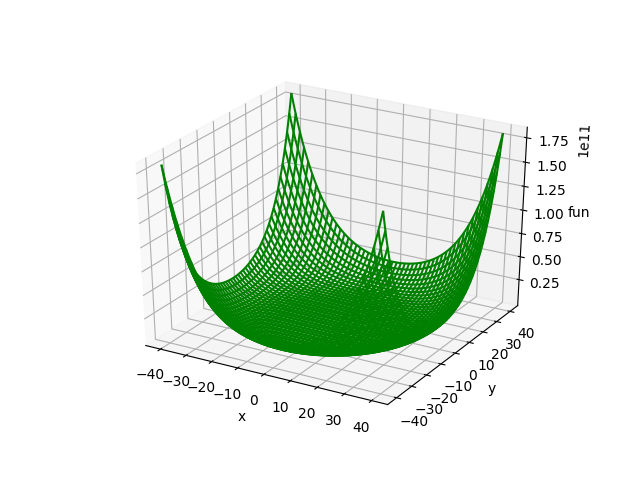

Local minima exists at z =  0.5 0.5 0.5 0.5 0.0


In [193]:
# Q.3.a

%matplotlib notebook

def f(x, y):
    return (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)


def plotCurve():
    x = y = np.linspace(-40, 40, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X, Y, fun, color='green')
#     ax.plot_surface(X, Y, fun, rstride=1, cstride=1, cmap='winter', edgecolor='none')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('fun')
    plt.show()
    

plotCurve()
print("Local minima exists at z = ", f(1, 0), f(0, 1), f(0, -1), f(-1, 0), f(0, 0))

In [194]:
def getGrad(x, y):
    grad = {'x': 0.0, 'y': 0.0}
    
    grad['x'] = (100/3)*x*(x**2 + y**2)**2 - (418/9)*x*(x**2 + y**2) + (118/9)*x
    grad['y'] = (100/3)*y*(x**2 + y**2)**2 - (418/9)*y*(x**2 + y**2) + (118/9)*y
    
    return grad


def gradDescent():
    x, y = -0.5, 0.2
    nIter = 0
    thresErr = 0.001
    nOpt = 0.00001
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x, y)
        x = x - nOpt*grad['x']
        y = y - nOpt*grad['y']
        
        nIter += 1
        
    return errors, weights


errors, weights = gradDescent()

Iter = 0. Error = 1.0601 at x = -0.5000 and y = 0.2000
Iter = 2000. Error = 1.0148 at x = -0.4721 and y = 0.1889
Iter = 4000. Error = 0.9426 at x = -0.4369 and y = 0.1748
Iter = 6000. Error = 0.8374 at x = -0.3944 and y = 0.1577
Iter = 8000. Error = 0.7011 at x = -0.3459 and y = 0.1384
Iter = 10000. Error = 0.5476 at x = -0.2945 and y = 0.1178
Iter = 12000. Error = 0.3986 at x = -0.2438 and y = 0.0975
Iter = 14000. Error = 0.2726 at x = -0.1972 and y = 0.0789
Iter = 16000. Error = 0.1776 at x = -0.1568 and y = 0.0627
Iter = 18000. Error = 0.1117 at x = -0.1231 and y = 0.0493
Iter = 20000. Error = 0.0687 at x = -0.0959 and y = 0.0384
Iter = 22000. Error = 0.0416 at x = -0.0744 and y = 0.0298
Iter = 24000. Error = 0.0250 at x = -0.0575 and y = 0.0230
Iter = 26000. Error = 0.0149 at x = -0.0444 and y = 0.0177
Iter = 28000. Error = 0.0089 at x = -0.0342 and y = 0.0137
Iter = 30000. Error = 0.0053 at x = -0.0263 and y = 0.0105
Iter = 32000. Error = 0.0031 at x = -0.0203 and y = 0.0081
Iter 

Number of iterations for Gradient Descent = 36346


<IPython.core.display.Javascript object>


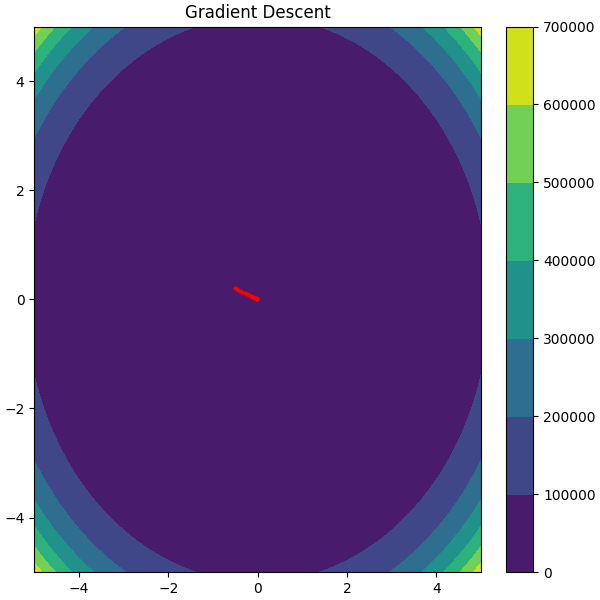

In [195]:
%matplotlib notebook

    
def plotContours():
    x = y = np.linspace(-5, 5, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Gradient Descent')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    

# plotError()
print("Number of iterations for Gradient Descent = {}".format(len(weights)))
plotContours()

In [196]:
# Q.3.b


def momentum():
    x, y = -0.5, 0.2
    nIter = 0
    thresErr = 0.001
    nOpt = 0.00001
    beta = 0.9
    delx = 0.0
    dely = 0.0
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x, y)
        delx = beta*delx - nOpt*grad['x']
        dely = beta*dely - nOpt*grad['y']
        x = x + delx
        y = y + dely
        
        nIter += 1
        
    return errors, weights


errors, weights = momentum()

Iter = 0. Error = 1.0601 at x = -0.5000 and y = 0.2000
Iter = 2000. Error = 0.0702 at x = -0.0970 and y = 0.0388


Number of iterations for momentum = 3625


<IPython.core.display.Javascript object>


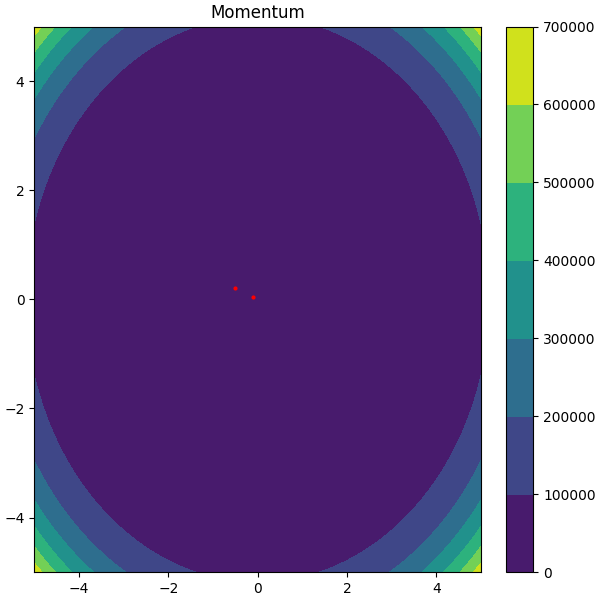

In [197]:
def plotContours():
    x = y = np.linspace(-5, 5, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Momentum')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    

print("Number of iterations for momentum = {}".format(len(weights)))
plotContours()

In [198]:
# Q.3.c


def nestMomentum():
    x, y = -2.5, 4.5
    nIter = 0
    thresErr = 0.001
    nOpt = 0.00001
    beta = 0.9
    delx = 0.0
    dely = 0.0
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x + beta*delx, y)
        delx = beta*delx - nOpt*grad['x']
        
        grad = getGrad(x, y + beta*dely)
        dely = beta*dely - nOpt*grad['y']
        
        x = x + delx
        y = y + dely
        
        nIter += 1
        
    return errors, weights


errors, weights = nestMomentum()

Iter = 0. Error = 95406.6250 at x = -2.5000 and y = 4.5000
Iter = 2000. Error = 0.0011 at x = -0.0107 and y = 0.0073


Number of iterations for Nestron momentum = 2035


<IPython.core.display.Javascript object>


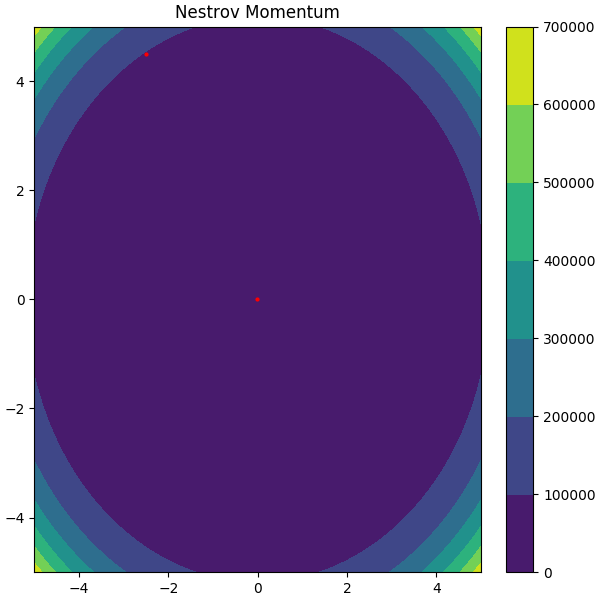

In [199]:
def plotContours():
    x = y = np.linspace(-5, 5, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Nestrov Momentum')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    
    
print("Number of iterations for Nestron momentum = {}".format(len(weights)))
plotContours()

In [200]:
# Q.3.d


def adam():
    x, y = -0.5, 0.2
    nIter = 0
    thresErr = 0.001
    nOpt = 0.001
    rho1, rho2 = 0.9, 0.999
    delta = 0.00000001
    s, r = 0.0, 0.0
    errors = []
    err = f(x, y)
    weights = []
    
    while(err > thresErr):
        err = f(x, y)
        if(nIter%2000 == 0):
            print("Iter = {}. Error = {:.4f} at x = {:.4f} and y = {:.4f}".format(nIter, err, x, y))
        errors.append(err)
        weights.append((x, y))
        
        grad = getGrad(x, y)
        
        nIter += 1
        
        s = rho1*s + (1-rho1)*grad['x']
        r = rho2*r + (1-rho2)*(grad['x']**2)
        sCap = s/(1 - rho1**nIter)
        rCap = r/(1 - rho2**nIter)
        delx = -nOpt*sCap/(np.sqrt(rCap) + delta)
        x = x + delx

        s = rho1*s + (1-rho1)*grad['y']
        r = rho2*r + (1-rho2)*(grad['y']**2)
        sCap = s/(1 - rho1**nIter)
        rCap = r/(1 - rho2**nIter)
        dely = -nOpt*sCap/(np.sqrt(rCap) + delta)
        y = y + dely
        
    return errors, weights

errors, weights = adam()

Iter = 0. Error = 1.0601 at x = -0.5000 and y = 0.2000
Iter = 2000. Error = 0.6602 at x = -0.2532 and y = 0.2526
Iter = 4000. Error = 0.2769 at x = -0.1515 and y = 0.1515
Iter = 6000. Error = 0.0498 at x = -0.0621 and y = 0.0620


Number of iterations for adam = 7739


<IPython.core.display.Javascript object>


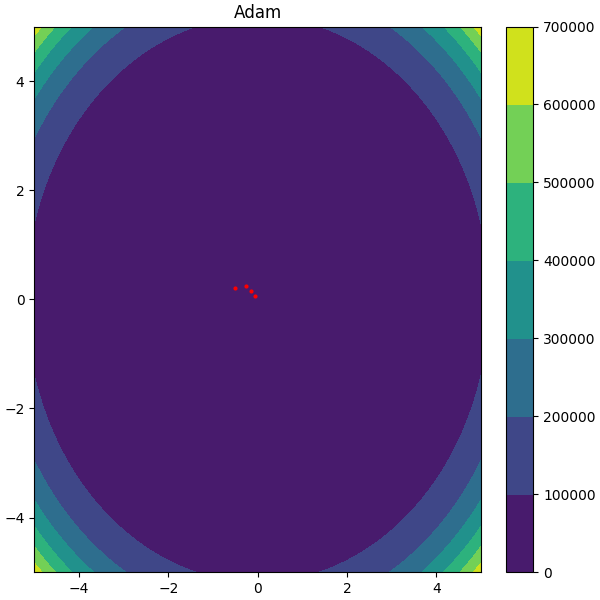

In [201]:
def plotContours():
    x = y = np.linspace(-5, 5, 1000)
    X, Y = np.meshgrid(x, y)
    fun = f(X, Y)
    
    fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))

    cp = ax.contourf(X, Y, fun)
    ax.set_title('Adam')
    fig.colorbar(cp)
    
    for i in range(0, len(weights), 2000):
        x, y = weights[i]
        ax.plot(x, y, 'ro', markersize=2)
    
    plt.show()
    

print("Number of iterations for adam = {}".format(len(weights)))
plotContours()

###  Experiment 1 : Starting point (-0.5, 0.2) 

Gradient Descent: Converged in `36346` steps    
Momentum: Converged in `3625` steps  
Nestrov Momentum: Converged `3627` in steps  
Adam: Converged in `7739` steps

###  Experiment 2 : Starting point (-2.5, 4.5)

Gradient Descent: Does not Converge. Stuck at local minima `z = 0.5`  
Momentum: Does not Converge. Stuck at local minima `z = 0.5`  
Nestrov Momentum: Converged in `2035` steps  
Adam: Does not Converge. Stuck at local minima `z = 0.5`

### Question 5

In [281]:
import pandas as pd
from sklearn.utils import shuffle


def readData():
    xls = pd.ExcelFile("Concrete_Data.xls")
    sheet = xls.parse(0)

    X = np.zeros((1030, 8))
    Y = np.zeros((1030, 1))
    for i, colName in enumerate(sheet):
        if(i != 8):
            for j, ele in enumerate(sheet[colName]):
                X[j, i] = ele
        elif(i == 8):
            for j, ele in enumerate(sheet[colName]):
                Y[j, 0] = ele

    return (X, Y)


def split(X, Y):
    X, Y = shuffle(X, Y)
    
    leng = int(X.shape[0]*0.7)
    xTrain = X[0:leng, :]  
    yTrain = Y[0:leng, :]
    xTest = X[leng:, :] 
    yTest = Y[leng:, :]
    
    return xTrain.T, yTrain.T, xTest.T, yTest.T
    
    
X, Y = readData()
xTrain, yTrain, xTest, yTest = split(X, Y)
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(8, 721) (1, 721) (8, 309) (1, 309)


In [545]:
def getWeights(l):
    W0 = np.random.randn(l[1], l[0]) * np.sqrt(2/l[0])
    b0 = np.zeros((l[1], 1))
    W1 = np.random.randn(l[2], l[1]) * np.sqrt(2/l[1])
    b1 = np.zeros((l[2], 1))
    
    return W0, b0, W1, b1


def getLoss(pred, trg):
    return (1/pred.shape[1]) * (np.linalg.norm(pred - trg)**2)
    
    
layers = [8, 50, 1]

In [546]:
def activation(Z0):
#     return np.tanh(Z0)
    return np.maximum(Z0, 0)


def gradActivation(A):
#     return (1 - np.tanh(A)**2)
    return np.where(A < 0, 0, 1)


def getGrad(Z0, Y0, yPred, W0, b0, W1, b1):
    numEx = xTrain.shape[1]
    
    dyPred = (2/numEx) * (yPred - yTrain)
    dW1 = dyPred @ Y0.T
    db1 = np.sum(dyPred, keepdims=True)
    dY0 = W1.T @ dyPred
    dZ0 = dY0 * gradActivation(Z0)
    dW0 = dZ0 @ xTrain.T
    db0 = np.sum(dZ0, axis=1, keepdims=True)
    
    return dW0, db0, dW1, db1

In [560]:
def gradDescent():
    lr = 0.00001
    W0, b0, W1, b1 = getWeights(layers)
    loss = 10000
    thresLoss = 0.01
    nIter = 0
    lrDecay = True
    
    while(loss > thresLoss):
        Z0 = W0 @ xTrain + b0
        Y0 = activation(Z0)
        yPred = W1 @ Y0 + b1
      
        if(nIter%2000 == 0):
            loss = getLoss(yPred, yTrain)
            print("Iter = {}. Loss = {}".format(nIter, loss))
#             if(loss < 150 and lrDecay == True):
#                 lr = lr/10
#                 lrDecay = False
#                 print("lr decreased!")
        
        dW0, db0, dW1, db1 = getGrad(Z0, Y0, yPred, W0, b0, W1, b1)
    
        W0 = W0 - lr * dW0
        b0 = b0 - lr * db0
        W1 = W1 - lr * dW1
        b1 = b1 - lr * db1
        
        nIter += 1
        
        
gradDescent()

Iter = 0. Loss = 26977.365101669784
Iter = 2000. Loss = 310.20709537258335


KeyboardInterrupt: 

In [564]:
def quickProp():
    lr = 0.00001
    W0, b0, W1, b1 = getWeights(layers)
    loss = 10000
    thresLoss = 0.01
    nIter = 0
    delta = 0.00000001
    
    while(loss > thresLoss):
        Z0 = W0 @ xTrain + b0
        Y0 = activation(Z0)
        yPred = W1 @ Y0 + b1
      
        if(nIter%2000 == 0):
            loss = getLoss(yPred, yTrain)
            print("Iter = {}. Loss = {}".format(nIter, loss))
        
        dW0, db0, dW1, db1 = getGrad(Z0, Y0, yPred, W0, b0, W1, b1)

        if(nIter == 0):
            W0Prev, dW0Prev = W0, dW0
            b0Prev, db0Prev = b0, db0
            W1Prev, dW1Prev = W1, dW1
            b1Prev, db1Prev = b1, db1
            
            W0 = W0 - lr * dW0
            b0 = b0 - lr * db0
            W1 = W1 - lr * dW1
            b1 = b1 - lr * db1
        elif(nIter != 0):
            delW0 = ((W0 - W0Prev)/(dW0 - dW0Prev + delta)) * (dW0)
            delb0 = ((b0 - b0Prev)/(db0 - db0Prev + delta)) * (db0)
            delW1 = ((W1 - W1Prev)/(dW1 - dW1Prev + delta)) * (dW1)
            delb1 = ((b1 - b1Prev)/(db1 - db1Prev + delta)) * (db1)
            
            W0Prev, dW0Prev = W0, dW0
            b0Prev, db0Prev = b0, db0
            W1Prev, dW1Prev = W1, dW1
            b1Prev, db1Prev = b1, db1
                        
            W0 = W0 - delW0
            b0 = b0 - delb0
            W1 = W1 - delW1
            b1 = b1 - delb1
                    
        nIter += 1
        
        
quickProp()

Iter = 0. Loss = 108584.6238506696
Iter = 2000. Loss = 273.3655027494887


KeyboardInterrupt: 

In [565]:
def RProp():
    lr = 0.00001
    alpha = 1.2
    beta = 0.5
    W0, b0, W1, b1 = getWeights(layers)
    loss = 10000
    thresLoss = 0.01
    nIter = 0
    maxDel, minDel = 0.8, -0.8
    
    while(loss > thresLoss):
        if(nIter == 0):
            Z0 = W0 @ xTrain + b0
            Y0 = activation(Z0)
            yPred = W1 @ Y0 + b1

            dW0, db0, dW1, db1 = getGrad(Z0, Y0, yPred, W0, b0, W1, b1)
            
            delW0, delb0, delW1, delb1 = lr*dW0, lr*db0, lr*dW1, lr*db1
            pdW0, pdb0, pdW1, pdb1 = dW0, db0, dW1, db1
        
        W0 = W0 - delW0
        b0 = b0 - delb0
        W1 = W1 - delW1
        b1 = b1 - delb1
        
        Z0 = W0 @ xTrain + b0
        Y0 = activation(Z0)
        yPred = W1 @ Y0 + b1
      
        if(nIter%2000 == 0):
            loss = getLoss(yPred, yTrain)
            print("Iter = {}. Loss = {}".format(nIter, loss))
        
        dW0, db0, dW1, db1 = getGrad(Z0, Y0, yPred, W0, b0, W1, b1)

        valid =  (np.sign(dW0) == np.sign(pdW0))
        delW0[valid] = np.minimum(alpha*delW0[valid], maxDel)
        pdW0[valid] = dW0[valid]
        W0[valid == False] = W0[valid == False] + delW0[valid == False]
        delW0[valid == False] = beta*delW0[valid == False]
        
        valid =  (np.sign(db0) == np.sign(pdb0))
        delb0[valid] = np.minimum(alpha*delb0[valid], maxDel)
        pdb0[valid] = db0[valid]
        b0[valid == False] = b0[valid == False] + delb0[valid == False]
        delb0[valid == False] = beta*delb0[valid == False]

        valid =  (np.sign(dW1) == np.sign(pdW1))
        delW1[valid] = np.minimum(alpha*delW1[valid], maxDel)
        pdW1[valid] = dW1[valid]
        W1[valid == False] = W1[valid == False] + delW1[valid == False]
        delW1[valid == False] = beta*delW1[valid == False]

        valid =  (np.sign(db1) == np.sign(pdb1))
        delb1[valid] = np.minimum(alpha*delb1[valid], maxDel)
        pdb1[valid] = db1[valid]
        b1[valid == False] = b1[valid == False] + delb1[valid == False]
        delb1[valid == False] = beta*delb1[valid == False]

        nIter += 1
        

RProp()

Iter = 0. Loss = 229318907.6822243
Iter = 2000. Loss = 294.8595005365318
Iter = 4000. Loss = 277.8228997660805
Iter = 6000. Loss = 275.14621932886735


KeyboardInterrupt: 

## Experiments

1. All experiments are run for 50000 iterations.  
2. Below are the root mean squared measurements for all permutation of activation functions, hidden units and optimizers used. 
3. Full batch optimization has been done in all the experiments. As most of the momentum based algorithms seems to stuck at local minimas so implementing mini-batch stochastic optimization would lead to further decrease in error.  
5. Best performance is obtained using `tanh` activation function, with `75` hidden neurons and `Gradient Descent` optimizer. The RMS is `125.534`.

## `tanh` activation function

### 25 neurons in hidden layer
1. `Gradient Descent`: `169.243` (Continue to decrease)  
2. `RProp`: `283.282` (Stuck at local minima)  
3. `QuickProp`: `277.209` (Stuck at local minima)  


### 50 neurons in hidden layer
1. `Gradient Descent`: `135.691` (Continue to decrease)  
2. `RProp`: `226.919` (Stuck at local minima)  
3. `QuickProp`: `242.749`  (Stuck at local minima)     


### 75 neurons in hidden layer
1. `Gradient Descent`: `125.534` (Continue to decrease)   
2. `RProp`: `168.865` (Stuck at local minima)  
3. `QuickProp`: `169.828`  (Stuck at local minima)   


## `relu` activation function

### 25 neurons in hidden layer
1. `Gradient Descent`: `456.559` (Continue to decrease)     
2. `RProp`: `1708.771` (Stuck at local minima)
3. `QuickProp`: `236.057`  (Stuck at local minima)     


### 50 neurons in hidden layer
1. `Gradient Descent`: `462.129` (Continue to decrease)     
2. `RProp`: `326178.741` (Stuck at local minima)  
3. `QuickProp`: `245.089` (Stuck at local minima)  


### 75 neurons in hidden layer
1. `Gradient Descent`: `449.710`    
2. `RProp`: `22651.829` 
3. `QuickProp`: `1082.698`   